<a href="https://colab.research.google.com/github/cccg8105/notebook_AD/blob/master/template%20Series%20temporales/Suavizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Suavizado de series temporales

## Importación de datos

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

# carga de archivo
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/cccg8105/notebook_AD/master/Frecuencia%20inscripciones/data/conversionesPE.csv", index_col=0)

raw_csv_data.head()

,FechaConsultora,FuenteIngreso,cantidad,Pais
1,26/08/19,MovilGZ,33,Perú
2,10/03/19,CALL CENTER,1,Perú
3,04/11/19,MovilGZ,30,Perú
4,13/02/19,UB,31,Perú
5,04/11/19,CALL CENTER,4,Perú


### Transformación y formateo de datos

> Bloque con sangría



In [8]:
df_comp = raw_csv_data.copy()

df_comp=df_comp[df_comp.FuenteIngreso == "UB"]
# formateo de fecha 
df_comp['Fecha'] = pd.to_datetime(raw_csv_data.FechaConsultora, dayfirst = True)
df_comp = df_comp.groupby(['Fecha']).sum().reset_index()

#df_comp.set_index('Fecha', inplace=True, verify_integrity=True)
#df_comp.index = pd.DatetimeIndex(df_comp.index).to_period('d')

dateColumnName = "Fecha"
analizedValue = "cantidad"
unused_columns = ['cantidad']

#creacion de indice fecha
df_comp.set_index(dateColumnName, inplace=True, verify_integrity=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

df_comp['analizedValue']=df_comp[analizedValue]
df_comp = df_comp.drop(unused_columns, axis=1)

df_comp.head(5)

,analizedValue
Fecha,
2018-01-02,2.0
2018-01-03,3.0
2018-01-04,4.0
2018-01-05,7.0
2018-01-08,10.0


### Separación en entrenamiento y datos de prueba

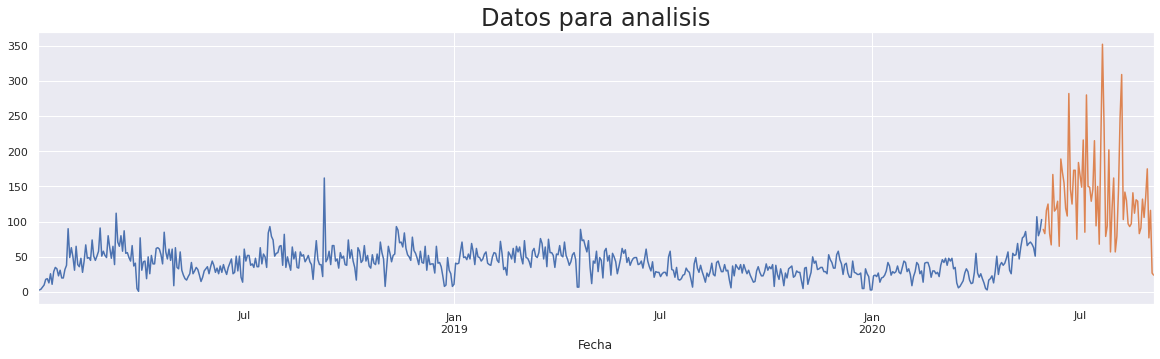

In [11]:
porcentajeEntrenamiento = 0.9
size = int(len(df_comp)*porcentajeEntrenamiento)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

df.analizedValue.plot(figsize = (20,5))
df_test.analizedValue.plot(figsize = (20,5))
plt.title("Datos para analisis", size= 24)
plt.show()